# Background

Twitter is a micro-blogging social media platform with 217.5 million daily active users globally. With 500 million new tweets (posts) daily, the topics of these tweets varies widely – k-pop, politics, financial news… you name it! Individuals use it for news, entertainment, and discussions, while corporations use them to as a marketing tool to reach out to a wide audience. Given the freedom Twitter accords to its user, Twitter can provide a conducive environment for productive discourse, but this freedom can also be abused, manifesting in the forms of racism and sexism.

# Problem Statement

With Twitter’s significant income stream coming from advertisers, it is imperative that Twitter keeps a substantial user base. On the other hand, Twitter should maintain a safe space for users and provide some level of checks for the tweets the users put out into the public space, and the first step would be to identify tweets that espouse racist or sexist ideologies, and then Twitter can direct the users to appropriate sources of information where users can learn more about the community that they offend or their subconscious biases so they will be more aware of their racist/sexist tendencies. Thus, to balance, Twitter has to be accurate in filtering inappropriate tweets from innocuous ones, and the kind of inappropriateness of flagged tweets (tag - racist or sexist).

F1-scores will be the primary metric as it looks at both precision and recall, each looking at false positives (FPs) and false negatives (FNs) respectively, and is a popular metric for imbalanced data as is the case with the dataset used.

For the purpose of explanation, racist tweets are used as the ‘positive’ case.

In this context, FPs are the cases where the model erroneously flags out tweets as racist when the tweet is actually innocuous/sexist. FNs are cases where the model erroneously flags out tweets as innocuous/sexist but the tweets are actually racist.

Thus, higher F1-scores are preferred.

# Importing Libraries

In [7]:
# Standard libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Changing display settings
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_row', 100)

# Importing dataset

Datasets are from Mendeley Data that provides data from different social media platforms with labels provided. The datasets provided consists of Tweets from Twitter and Wikipdia discussion pages.

[Mendeley Data](https://data.mendeley.com/datasets/jf4pzyvnpj/1)

[kaggle](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification)

In [3]:
# Train data

# Importing Twitter datasets from Mendeley Data
twitter = pd.read_csv('../Capstone/data/twitter_parsed_dataset.csv')
twitter_racism = pd.read_csv('../Capstone/data/twitter_racism_parsed_dataset.csv')
twitter_sexism = pd.read_csv('../Capstone/data/twitter_sexism_parsed_dataset.csv')

# Test data

# Importing kaggle twitter dataset
kaggle_twitter = pd.read_csv('../Capstone/data/cyberbullying_tweets.csv')

# High level Sensing of Dataset

## Twitter

From Twitter, there are 3 datasets:
* twitter_parsed
* twitter_racism_parsed
* twitter_sexism_parsed

Based on the shape and value_counts of each dataset, the 3 datasets all have 11501 innocuous texts, with...
* twitter_racism_parsed having 1970 racist texts
* twitter_sexism_parsed having 3378 sexist texts
* twitter_parsed having 1970 racist texts and 3378 sexist texts

To check whether it is possible to just use twitter_parsed as a representative dataset from Twitter there are 3 things that have to be checked:
1. The 11501 innocuous texts are the same in all 3 datasets
2. The 1970 racist texts are the same in both twitter_parsed and twitter_racism_parsed
3. The 3378 sexist texts are the same in both twitter_parsed and twitter_sexism_parsed

### Twitter - Base

In [4]:
twitter.head()

,index,id,Text,Annotation,oh_label
0,5.750000e+17,5.750000e+17,@halalflaws @biebervalue @greenlinerzjm I read them in context.No change in meaning. The history...,none,0
1,5.720000e+17,5.720000e+17,@ShreyaBafna3 Now you idiots claim that people who tried to stop him from becoming a terrorist m...,none,0
2,3.900000e+17,3.900000e+17,"RT @Mooseoftorment Call me sexist, but when I go to an auto place, I'd rather talk to a guy",sexism,1
3,5.680000e+17,5.680000e+17,"@g0ssipsquirrelx Wrong, ISIS follows the example of Mohammed and the Quran exactly.",racism,1
4,5.760000e+17,5.760000e+17,#mkr No No No No No No,none,0


In [5]:
twitter.shape

(16849, 5)

In [6]:
twitter.Annotation.value_counts()

none      11501
sexism     3378
racism     1970
Name: Annotation, dtype: int64

In [9]:
twitter_annotations = pd.DataFrame(twitter.Annotation.value_counts())
twitter_annotations

,Annotation
none,11501
sexism,3378
racism,1970


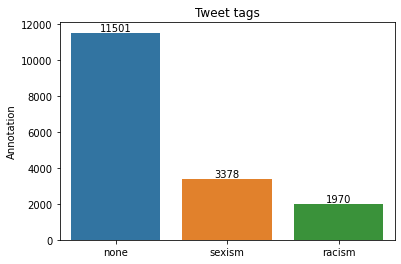

In [10]:
# Plotting Tweet tags
fig, ax = plt.subplots()
sns.barplot(x = twitter_annotations.index, y= "Annotation", data= twitter_annotations).set(title = 'Tweet tags')
ax.bar_label(ax.containers[0]);

In [7]:
twitter.dtypes

index         float64
id            float64
Text           object
Annotation     object
oh_label        int64
dtype: object

### Twitter - Racism

In [8]:
twitter_racism.head()

,index,id,Text,Annotation,oh_label
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hindus in Bangladesh continues in 2014. #Islam http:/...,racism,1
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamophobia is like the idea of Naziphobia. Islam is a re...,racism,1
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden death cook off looks like it's gonna be intense #MKR",none,0
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0


In [9]:
twitter_racism.shape

(13471, 5)

In [10]:
twitter_racism.Annotation.value_counts()

none      11501
racism     1970
Name: Annotation, dtype: int64

In [11]:
twitter_racism.dtypes

index         float64
id            float64
Text           object
Annotation     object
oh_label        int64
dtype: object

### Twitter - Sexism

In [12]:
twitter_sexism.head()

,index,id,Text,Annotation,oh_label
0,5.350000e+17,5.350000e+17,RT @BeepsS: @senna1 @BeepsS: I'm not sexist but fuck if you're a woman and you can't Cook get yo...,sexism,1
1,5.760000e+17,5.760000e+17,There's some very hate able teams this year #MKR,none,0
2,5.720000e+17,5.720000e+17,"RT @The_Eccles: ""Everyone underestimated us"" \nWe still do, as well as underestimating the judgi...",none,0
3,5.720000e+17,5.720000e+17,RT @NOTLukeDarcy: did @Channel7 or #MKR actually check if any of these people could cook? #WITB,none,0
4,4.430000e+17,4.430000e+17,"No, you don't. @Shut_Up_Jeff: I thought of a really funny joke and I promise I'm not sexist but ...",sexism,1


In [13]:
twitter_sexism.shape

(14879, 5)

In [14]:
twitter_sexism.Annotation.value_counts()

none      11501
sexism     3378
Name: Annotation, dtype: int64

In [15]:
twitter_sexism.dtypes

index         float64
id            float64
Text           object
Annotation     object
oh_label        int64
dtype: object

### Checking Twitter Innocuous Texts

In [16]:
# Creating function to check if a given text that is present in one dataset is present in another
def check_text(df1, df2, col_df1_index, col_df2_index):
    discrepancy_count = 0
    for i in range(df1.shape[0]):
        if df1.iloc[i,col_df1_index] in df2.Text.values:
            discrepancy_count += 0
        else:
            discrepancy_count += 1
    for i in range(df1.shape[0]):
        if df2.iloc[i,col_df2_index] in df1.Text.values:
            discrepancy_count += 0
        else:
            discrepancy_count += 1
    return discrepancy_count

In [17]:
# To check if the 11501 innocuous rows are the same between twitter_racism, twitter_sexism and twitter
twitter_racism_innoc = twitter_racism.loc[twitter_racism['oh_label'] == 0]
twitter_sexism_innoc = twitter_sexism.loc[twitter_sexism['oh_label'] == 0]

assert twitter_racism_innoc.shape == twitter_sexism_innoc.shape

In [18]:
# To check if the 11501 innocuous texts are the same in both twitter_racism_parsed and twitter_sexism_parsed
check_text(twitter_racism_innoc, twitter_sexism_innoc, 2, 2)

0

We can see that the 11501 innocuous texts in twitter_racism_parsed and twitter_sexism_parsed are the same.

In [19]:
# Isolating only innocuous texts from twitter_parsed
twitter_innoc = twitter.loc[twitter['oh_label'] == 0]

In [20]:
# To check if the 11501 innocuous texts are the same in twitter_parsed and both twitter_racism_parsed and twitter_sexism_parsed
check_text(twitter_innoc, twitter_racism_innoc, 2, 2)

0

In [21]:
check_text(twitter_innoc, twitter_sexism_innoc, 2, 2)

0

### Checking Flagged Texts

It is now established that the 11501 innocuous rows are the same, we will next look at the flagged texts.

First check for texts flagged as racist.

In [22]:
# Isolating texts flagged as racist
twitter_racist = twitter.loc[twitter['Annotation'] == 'racism']
twitter_racism_racist = twitter_racism.loc[twitter_racism['oh_label'] == 1]

assert twitter_racist.shape == twitter_racism_racist.shape

In [23]:
check_text(twitter_racist, twitter_racism_racist, 2, 2)

0

Now that the flagged racist texts are the same, now to check texts flagged as sexist.

In [24]:
# Isolating texts flagged as sexist
twitter_sexist = twitter.loc[twitter['Annotation'] == 'sexism']
twitter_sexism_sexist = twitter_sexism.loc[twitter_sexism['oh_label'] == 1]

assert twitter_sexist.shape == twitter_sexism_sexist.shape

In [25]:
check_text(twitter_sexist, twitter_sexism_sexist, 2, 2)

0

##### Now that we have established that flagged texts from twitter_racism and twitter_sexism are present in the twitter dataset, and that innocuous texts are the same in all 3 datasets, we can drop the twitter_racism and twitter_sexism datasets and just use the twitter dataset.

# Dropping Unneccessary Columns

In [26]:
twitter.head()

,index,id,Text,Annotation,oh_label
0,5.750000e+17,5.750000e+17,@halalflaws @biebervalue @greenlinerzjm I read them in context.No change in meaning. The history...,none,0
1,5.720000e+17,5.720000e+17,@ShreyaBafna3 Now you idiots claim that people who tried to stop him from becoming a terrorist m...,none,0
2,3.900000e+17,3.900000e+17,"RT @Mooseoftorment Call me sexist, but when I go to an auto place, I'd rather talk to a guy",sexism,1
3,5.680000e+17,5.680000e+17,"@g0ssipsquirrelx Wrong, ISIS follows the example of Mohammed and the Quran exactly.",racism,1
4,5.760000e+17,5.760000e+17,#mkr No No No No No No,none,0


In [27]:
twitter_final = twitter.drop(columns = ['index','id'])

In [28]:
twitter_final.head()

,Text,Annotation,oh_label
0,@halalflaws @biebervalue @greenlinerzjm I read them in context.No change in meaning. The history...,none,0
1,@ShreyaBafna3 Now you idiots claim that people who tried to stop him from becoming a terrorist m...,none,0
2,"RT @Mooseoftorment Call me sexist, but when I go to an auto place, I'd rather talk to a guy",sexism,1
3,"@g0ssipsquirrelx Wrong, ISIS follows the example of Mohammed and the Quran exactly.",racism,1
4,#mkr No No No No No No,none,0


# Exporting training dataset

In [29]:
twitter_final.to_csv('../Capstone/data/twitter_final.csv', index = False)